In [1]:
# Import Libraries
import pandas as pd
# We will commonly use pandas to handle dataframes, which is a crucial library for handling datasets in ML tasks.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

from pickle import dump

In [2]:
# import dataset(s)
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv", sep = ",")
df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


Quick EDA

In [3]:
print("Data Shape:", df.shape)
print("\nData Info:")
print(df.info())

Data Shape: (891, 3)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB
None


In [4]:
# Summary statistics of numerical columns
print(df.describe())

         polarity
count  891.000000
mean     0.344557
std      0.475490
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000


In [5]:
# Checking for missing values
print(df.isnull().sum())

package_name    0
review          0
polarity        0
dtype: int64


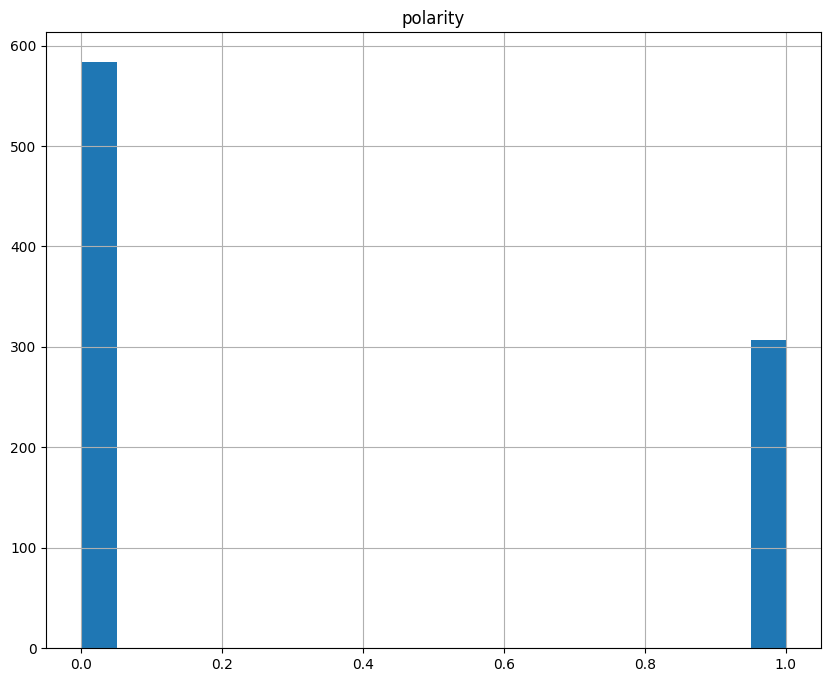

In [6]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].hist(bins=20, figsize=(10, 8))
plt.show()

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].value_counts(), "\n")

Column: package_name
package_name
com.facebook.katana           40
com.linkedin.android          40
com.king.candycrushsaga       40
com.supercell.clashofclans    40
com.imangi.templerun2         40
com.facebook.orca             40
com.viber.voip                40
org.mozilla.firefox           40
com.opera.mini.native         40
com.dropbox.android           40
com.Slack                     40
com.uc.browser.en             40
com.evernote                  40
com.android.chrome            39
com.twitter.android           39
com.hamrokeyboard             39
com.whatsapp                  39
com.tencent.mm                39
com.google.android.talk       39
com.rovio.angrybirds          39
com.hamropatro                38
com.shirantech.kantipur       36
jabanaki.todo.todoly          24
Name: count, dtype: int64 

Column: review
review
they're everywhere i see angry birds everywhere because i can't stop playing this game. get out my head devs! 4 đ because nothing's perfect               

In [8]:
# Drop the 'package_name' column
df = df.drop('package_name', axis=1)

print(df.head())

                                              review  polarity
0   privacy at least put some option appear offli...         0
1   messenger issues ever since the last update, ...         0
2   profile any time my wife or anybody has more ...         0
3   the new features suck for those of us who don...         0
4   forced reload on uploading pic on replying co...         0


In [9]:
df["review"] = df["review"].astype(str)

In [10]:
df["review"] = df["review"].str.strip().str.lower()

In [11]:
X = df['review']
y = df['polarity']

In [12]:
type(X)


pandas.core.series.Series

In [13]:
print(X)

0      privacy at least put some option appear offlin...
1      messenger issues ever since the last update, i...
2      profile any time my wife or anybody has more t...
3      the new features suck for those of us who don'...
4      forced reload on uploading pic on replying com...
                             ...                        
886    loved it i loooooooooooooovvved it because it ...
887    all time legendary game the birthday party lev...
888    ads are way to heavy listen to the bad reviews...
889    fun works perfectly well. ads aren't as annoyi...
890    they're everywhere i see angry birds everywher...
Name: review, Length: 891, dtype: object


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

331    just did the latest update on viber and yet ag...
733    keeps crashing it only works well in extreme d...
382    the fail boat has arrived the 6.0 version is t...
704    superfast, just as i remember it ! opera mini ...
813    installed and immediately deleted this crap i ...
Name: review, dtype: object

In [15]:
vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

In [16]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
model = BernoulliNB( alpha=0.01, binarize=0.0, fit_prior=True)
model.fit(X_train, y_train)

BernoulliNB(alpha=0.01)

In [18]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],  # Smoothing parameter
    'binarize': [0.0, 0.5, 1.0],  # Threshold for binarizing
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best model based on the search
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'alpha': 0.01, 'binarize': 0.0}


In [19]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {accuracy * 100:.2f}%")

Accuracy with best parameters: 83.80%


In [21]:
dump(model, open("naive_bayes.sav", "wb"))